In [44]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score


In [3]:
wine = datasets.load_wine()

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
X = wine.data
y = wine.target

In [7]:
X.shape

(178, 13)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [17]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print ("Acuracy : ", metrics.accuracy_score(y_test, y_predict))

Acuracy :  0.6851851851851852


In [18]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print ("Acuracy : ", metrics.accuracy_score(y_test, y_predict))

Acuracy :  0.7407407407407407


In [26]:
knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print ("Acuracy : ", metrics.accuracy_score(y_test, y_predict))

Acuracy :  0.7222222222222222


In [27]:
from sklearn.preprocessing import StandardScaler


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42, stratify = y)
knn = KNeighborsClassifier(n_neighbors= 30)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print ("Acuracy : ", metrics.accuracy_score(y_test, y_predict))

Acuracy :  0.9814814814814815


In [45]:
neighbors = list(range(1, 50, 1))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X_scaled, y, cv = 20, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [46]:
MSE = [1 - x for x in cv_scores]
MSE

[0.04930555555555549,
 0.06986111111111115,
 0.04805555555555563,
 0.04930555555555549,
 0.036805555555555536,
 0.04180555555555565,
 0.037361111111110956,
 0.04236111111111107,
 0.03180555555555564,
 0.03180555555555564,
 0.021805555555555522,
 0.036805555555555536,
 0.04236111111111107,
 0.036111111111111094,
 0.03236111111111106,
 0.03111111111111098,
 0.03111111111111098,
 0.030555555555555558,
 0.025555555555555665,
 0.030555555555555558,
 0.025555555555555665,
 0.030555555555555558,
 0.02055555555555555,
 0.025555555555555665,
 0.03180555555555564,
 0.036805555555555536,
 0.026805555555555527,
 0.03805555555555562,
 0.033055555555555616,
 0.033055555555555616,
 0.033055555555555616,
 0.026805555555555527,
 0.02055555555555555,
 0.02055555555555555,
 0.02055555555555555,
 0.02055555555555555,
 0.02055555555555555,
 0.02055555555555555,
 0.02055555555555555,
 0.026111111111111085,
 0.026111111111111085,
 0.0311111111111112,
 0.03736111111111118,
 0.03736111111111118,
 0.03180555555

In [51]:
optimal_k = neighbors[MSE.index(min(MSE))]
optimal_k

23

Text(0, 0.5, 'error')

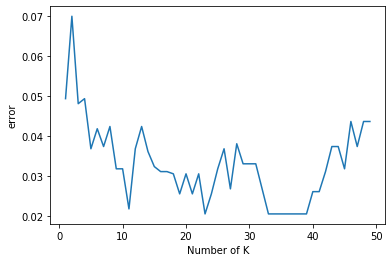

In [52]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of K')
plt.ylabel("error")

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42, stratify = y)

knn = KNeighborsClassifier(n_neighbors= 23)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print ("Acuracy : ", metrics.accuracy_score(y_test, y_predict))

Acuracy :  1.0
